In [32]:
# Loading necessary libraries

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Loading the image

img = mpimg.imread('image.jpg')

# Normalizing the image pixels to make computation easier

img = img/255

In [34]:
# Function to convert rgb to grayscale

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Function to plot the image matrix

def plot_img(img, grayscale = False):
    plt.figure(dpi = 100)
    if grayscale:
        img = rgb2gray(img)
        plt.imshow(img,cmap=plt.get_cmap('gray'), interpolation='none')
    else:
        plt.imshow(img, interpolation='none')
    plt.show()

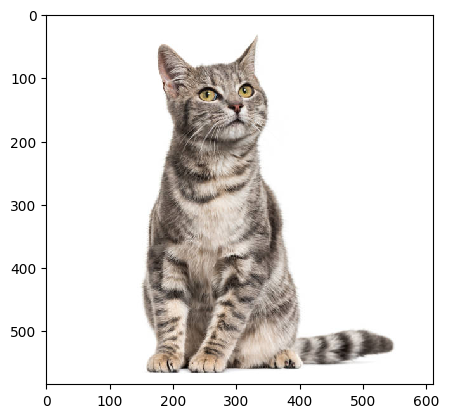

In [35]:
plot_img(img)

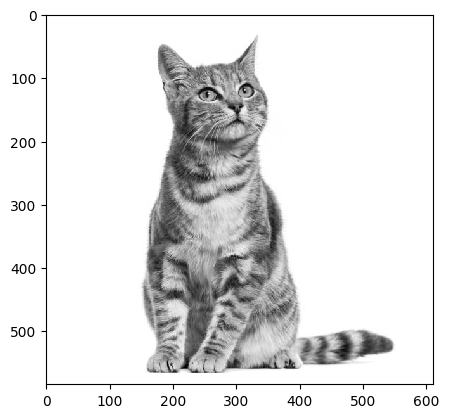

In [36]:
plot_img(img, grayscale = True)

In [37]:
# Separating red, green and blue layers from image

image_red = img[..., 0]
image_green = img[..., 1]
image_blue = img[..., 2]


# Using numpy.linalg lib to do Singular Value Decomposition

U_red, d_red, V_T_red = np.linalg.svd(image_red)
U_green, d_green, V_T_green = np.linalg.svd(image_green)
U_blue, d_blue, V_T_blue = np.linalg.svd(image_blue)


# Printing the shape of the matrices

print("Shape of Original image is", image_red.shape)
print("Shape of U is", U_red.shape)
print("Length of d is", len(d_red))
print("Shape of V_T is", V_T_red.shape)

Shape of Original image is (584, 612)
Shape of U is (584, 584)
Length of d is 584
Shape of V_T is (612, 612)


### Can the U, d, V_T restore the original image?

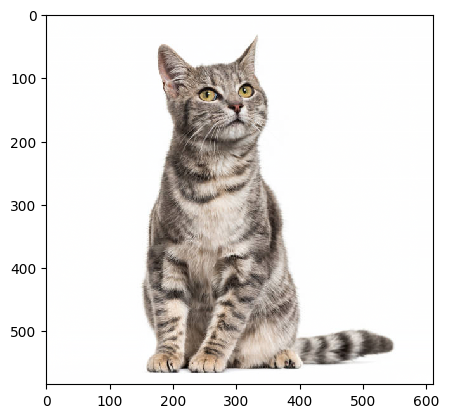

In [38]:
D_red = np.concatenate((np.diag(d_red), np.zeros((image_red.shape[0], image_red.shape[1]- len(d_red))) ), axis = 1)
restored_red = np.dot(U_red, np.dot(D_red, V_T_red))
D_green = np.concatenate((np.diag(d_green), np.zeros((image_green.shape[0], image_green.shape[1]- len(d_green))) ), axis = 1)
restored_green = np.dot(U_green, np.dot(D_green, V_T_green))
D_blue = np.concatenate((np.diag(d_blue), np.zeros((image_blue.shape[0], image_blue.shape[1]- len(d_blue))) ), axis = 1)
restored_blue = np.dot(U_blue, np.dot(D_blue, V_T_blue))

restored_img = np.stack((restored_red, restored_green, restored_blue), axis = -1)

restored_img[restored_img > 1] = 1
restored_img[restored_img < 0] = 0

plot_img(restored_img)

### Let's compare the size of original image and decomposed matrices

In [39]:
original_size = img.nbytes

decomposed_size = sum([matrix.nbytes for matrix in 
                       [U_red, d_red, V_T_red, U_green, d_green, V_T_green, U_blue, d_blue, V_T_blue]])

In [40]:
print("Original Image size is", original_size)
print("Sum of sizes of decomposed matrices is", decomposed_size)

Original Image size is 8577792
Sum of sizes of decomposed matrices is 17188416


## Let's compress the original image

In [48]:
def compress_img(img, k = 20):
    """'k' is compression parameter. The value of 'k' ranges from 1 to 100.
    By default 'k' value is set to 50."""
    
    
    image_red = img[..., 0]
    image_green = img[..., 1]
    image_blue = img[..., 2]

    k = int(image_red.shape[1]*(k/100))


    U_red, d_red, V_T_red = np.linalg.svd(image_red)
    U_green, d_green, V_T_green = np.linalg.svd(image_green)
    U_blue, d_blue, V_T_blue = np.linalg.svd(image_blue)
    
    size_oiginal_decomposed_vectors = sum([matrix.nbytes for matrix in 
                       [U_red, d_red, V_T_red, U_green, d_green, V_T_green, U_blue, d_blue, V_T_blue]])
    
    U_red = U_red[:, 0:k]
    d_red =  d_red[0:k]
    V_T_red = V_T_red[0:k, :]
    U_green = U_green[:, 0:k]
    d_green = d_green[0:k]
    V_T_green = V_T_green[0:k, :]
    U_blue = U_blue[:, 0:k]
    d_blue = d_blue[0:k]
    V_T_blue = V_T_blue[0:k, :]

    image_red_approx = np.dot(U_red, np.dot(np.diag(d_red), V_T_red))
    image_green_approx = np.dot(U_green, np.dot(np.diag(d_green), V_T_green))
    image_blue_approx = np.dot(U_blue, np.dot(np.diag(d_blue), V_T_blue))

    compressed_img = np.stack((image_red_approx, image_green_approx, image_blue_approx), axis = -1)

    compressed_img[compressed_img > 1] = 1
    compressed_img[compressed_img < 0] = 0
    size_compressed_decomposed_vectors = sum([matrix.nbytes for matrix in 
                       [U_red, d_red, V_T_red, U_green, d_green, V_T_green, U_blue, d_blue, V_T_blue]])
    
    print("Origin image size in bytes is", img.nbytes)
    print("Compressed image size in bytes is", compressed_img.nbytes)
    print("Sum of sizes of original decomposed vectors is", size_oiginal_decomposed_vectors)
    print("Sum of sizes of compressed decomposed vectors is", size_compressed_decomposed_vectors)
    

    plot_img(compressed_img)

Origin image size in bytes is 8577792
Compressed image size in bytes is 8577792
Sum of sizes of original decomposed vectors is 17188416
Sum of sizes of compressed decomposed vectors is 344736


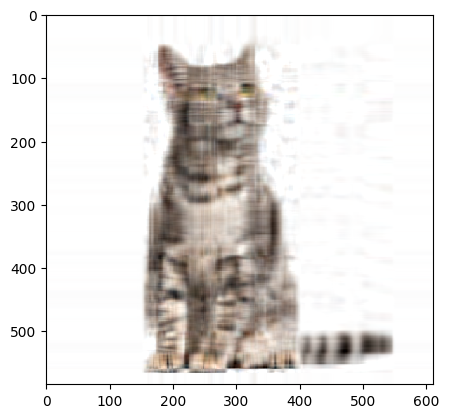

In [51]:
compress_img(img, k = 2)